In [4]:
import pandas as pd
price = pd.read_csv('price.csv')

In [5]:
price['Date'] = pd.to_datetime(price['Date'])

##### 1. Remove incorrect values

In [6]:
# large value on the inception date
price.loc[price['XMA.TO'] == 999999.9999, 'XMA.TO'] = None

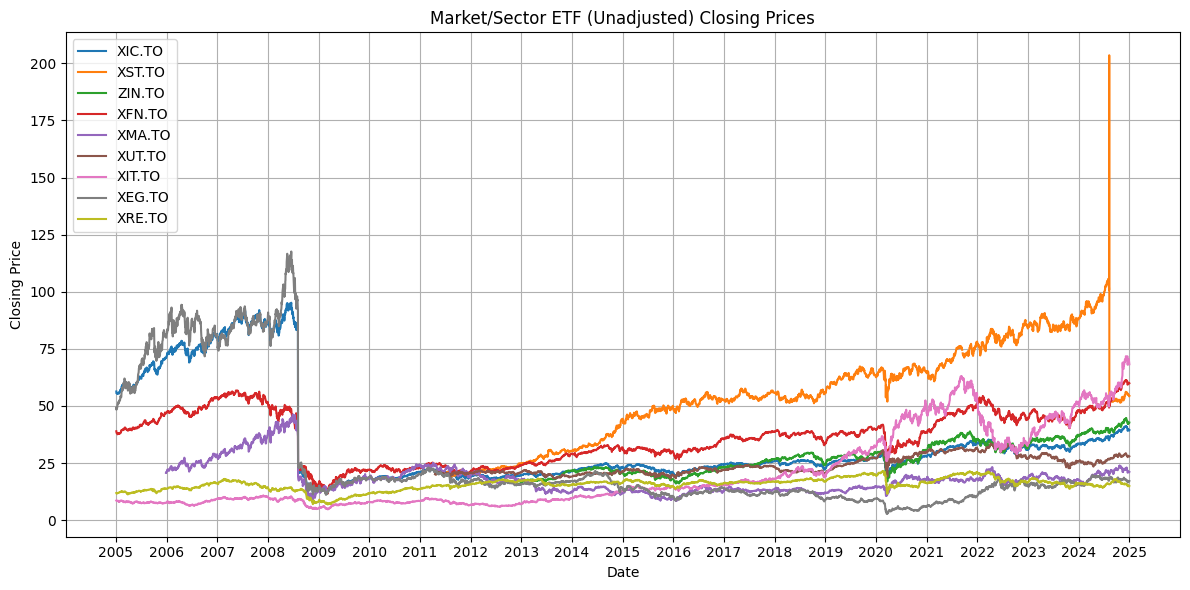

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

for column in price.columns[1:]:
    plt.plot(price['Date'], price[column], label=column)

# Customize the x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years

plt.title('Market/Sector ETF (Unadjusted) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

Notice four (4) long vertical bars at near 2009 for XIC.TO, XFN.TO, XMA.TO, and XEG.TO. Also notice a (1) long vertical bar appeared at near 2025 for XST.TO. These are due to stock split:

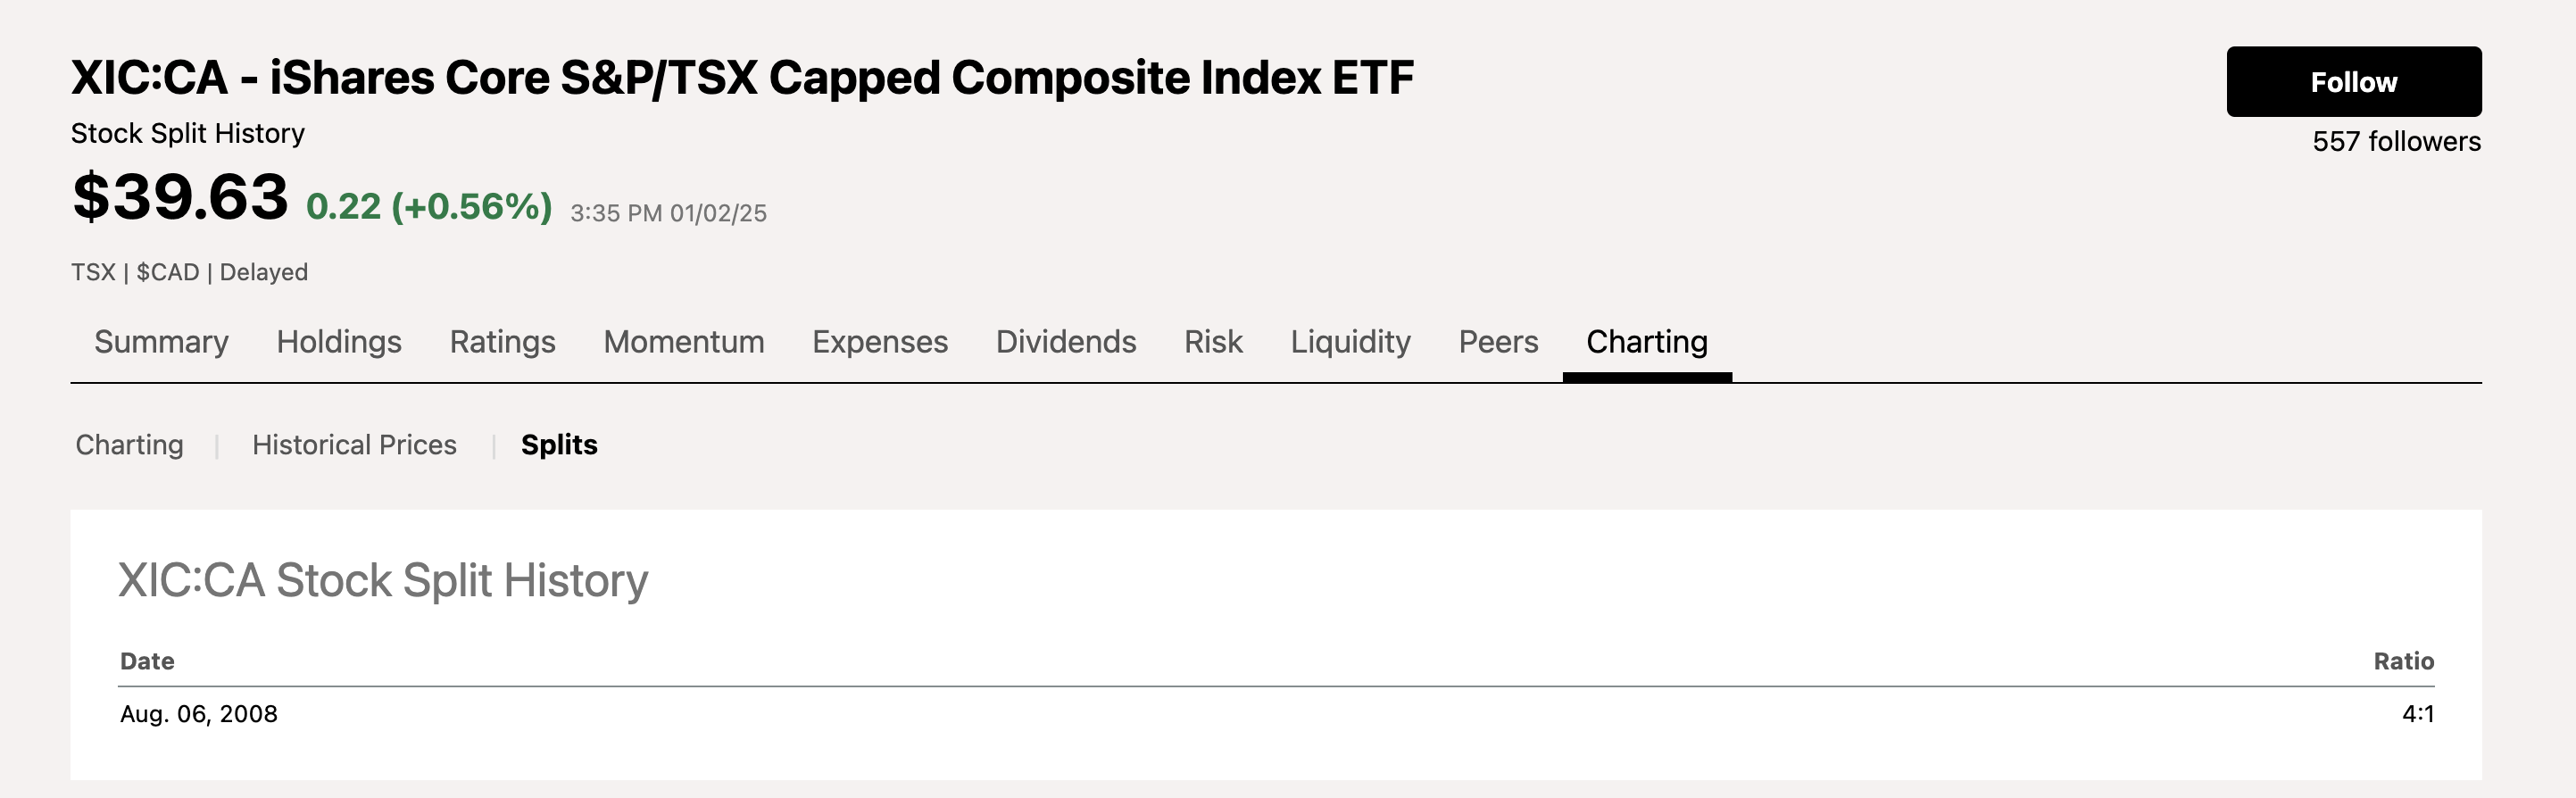
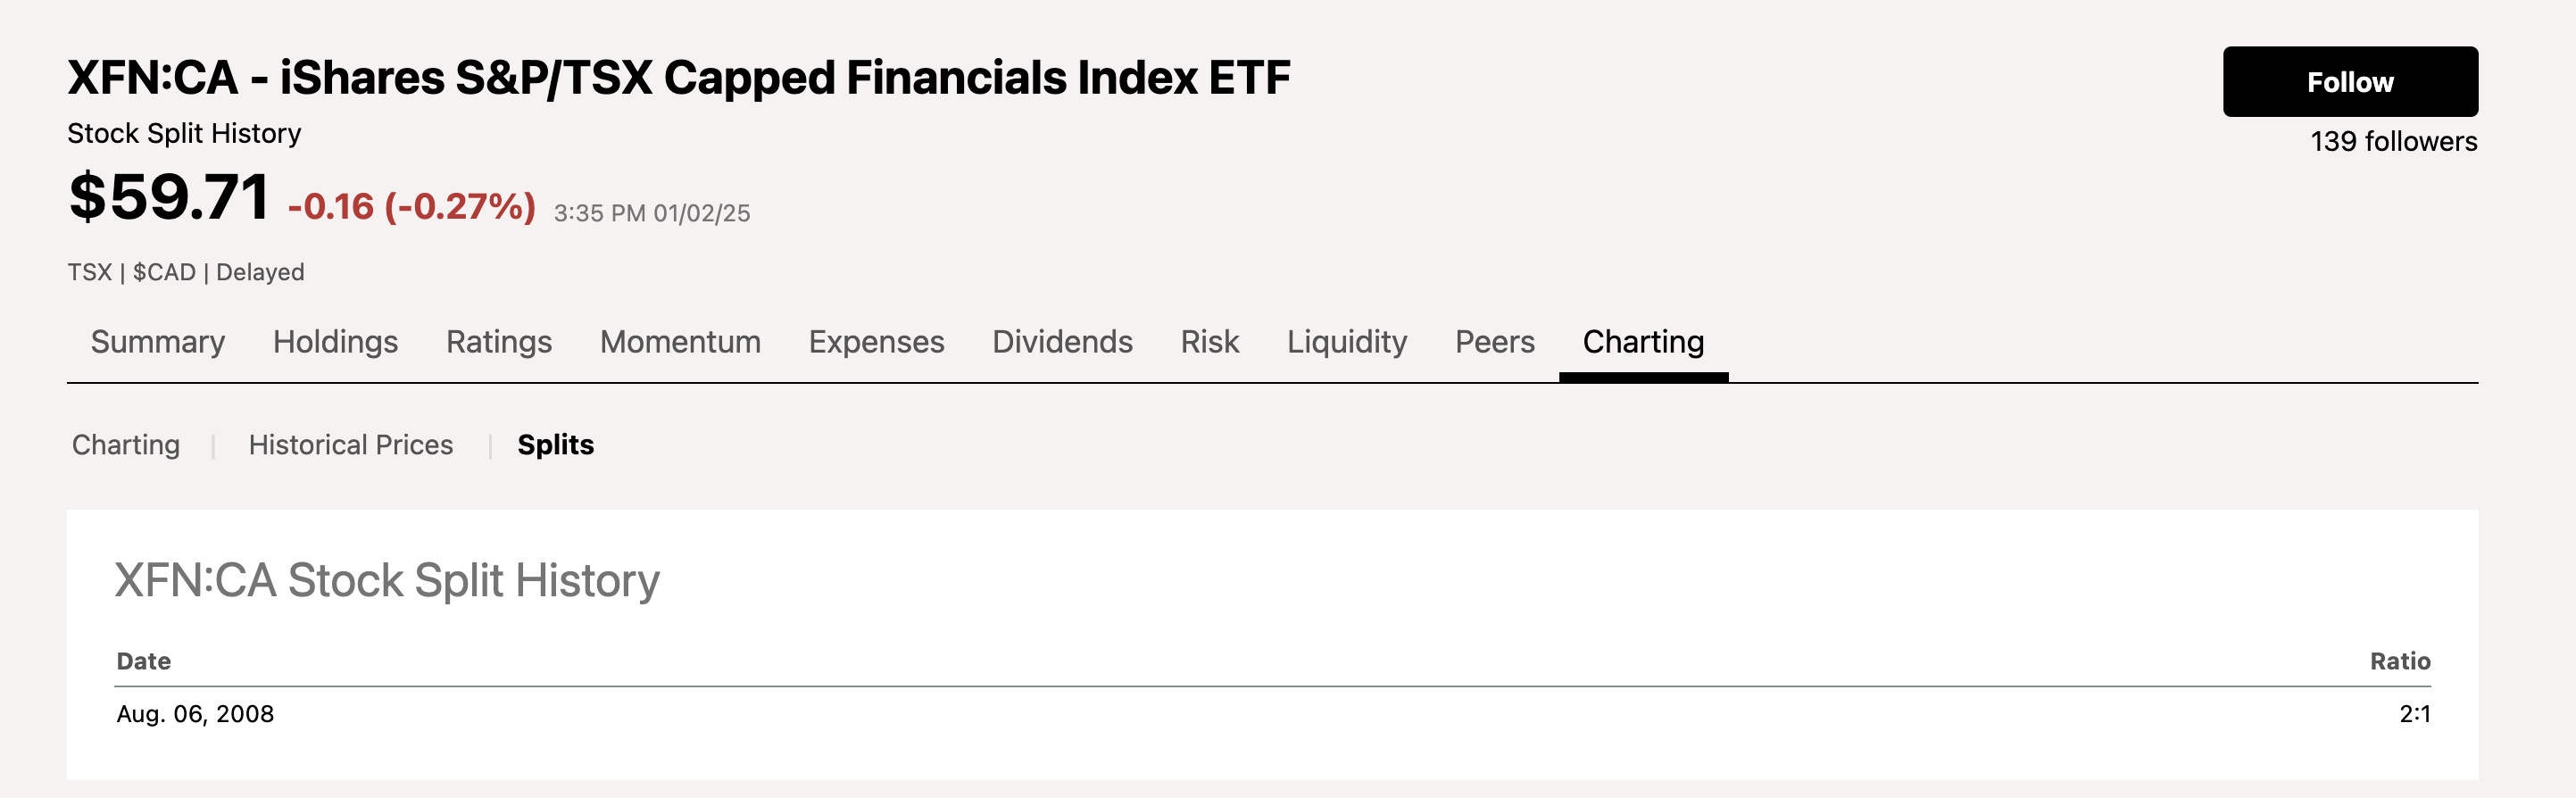
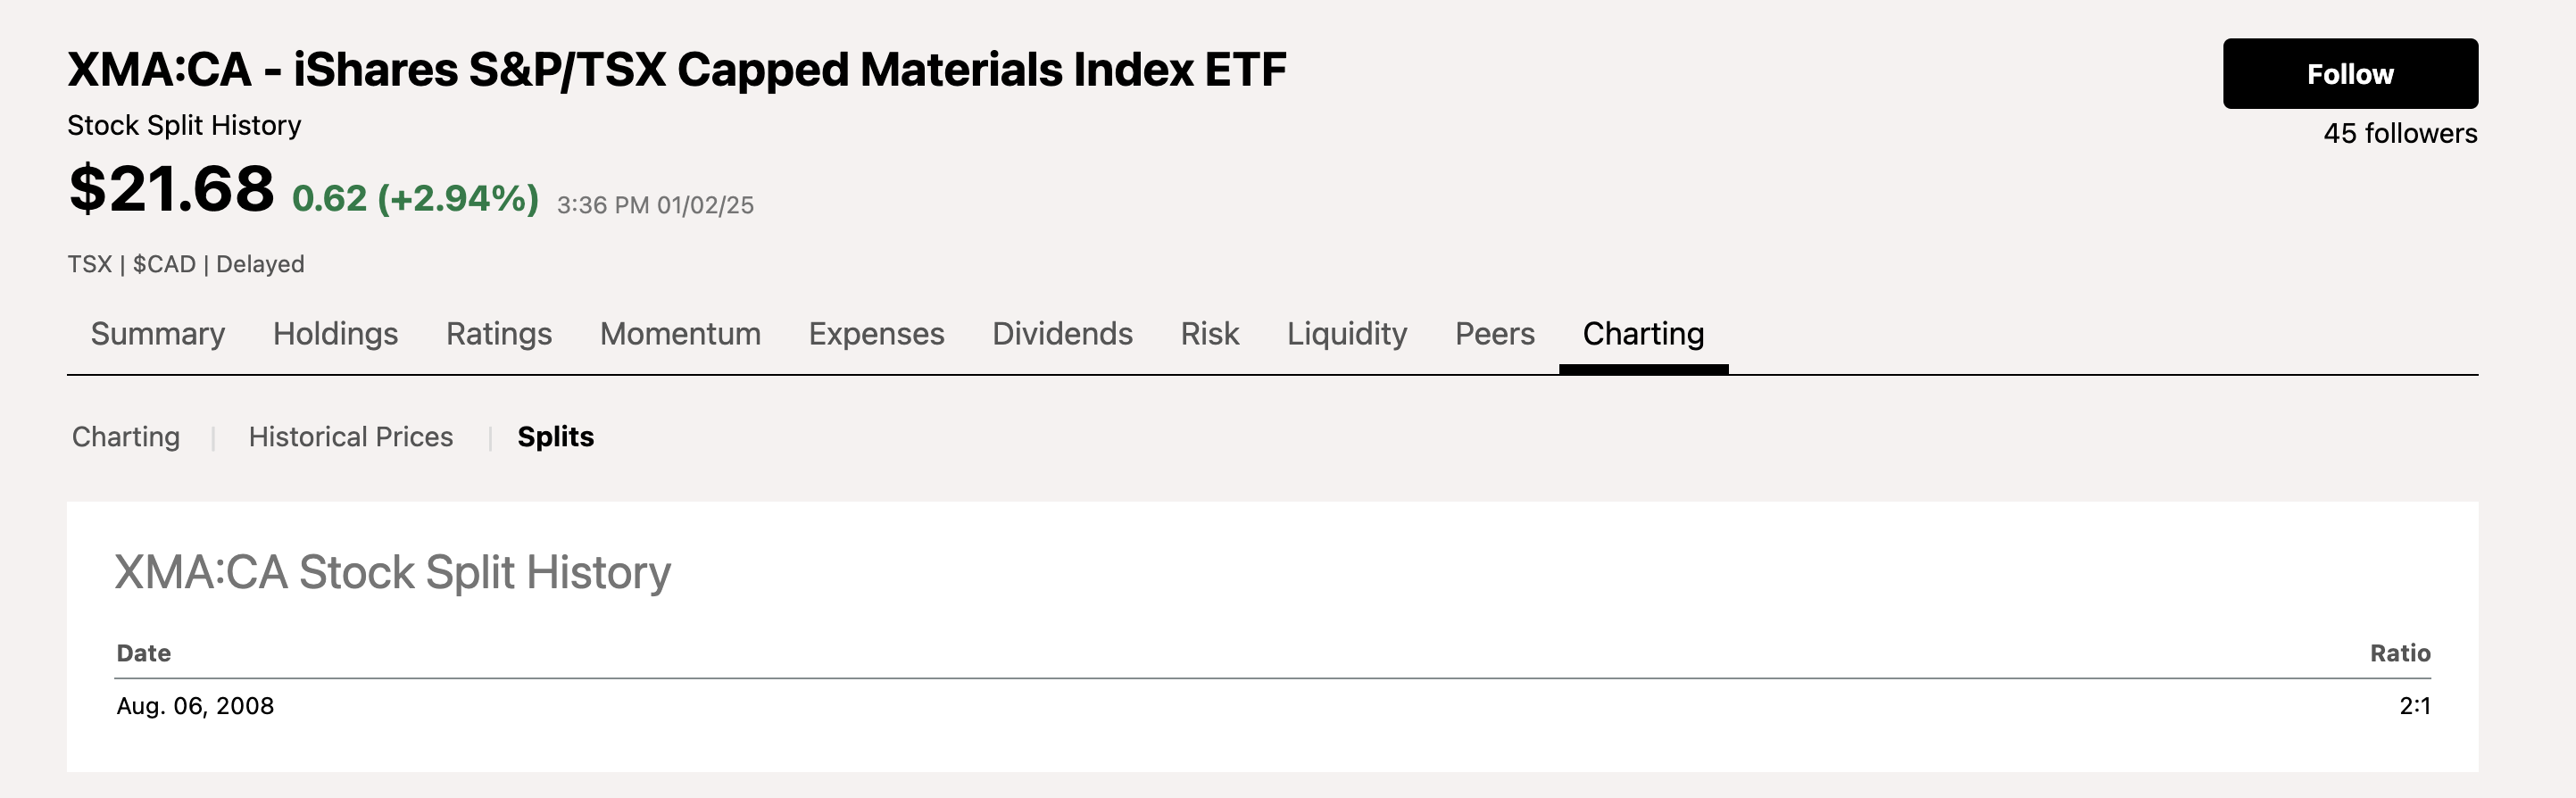
![https://seekingalpha.com/symbol/XEG:CA/splits](image.png)
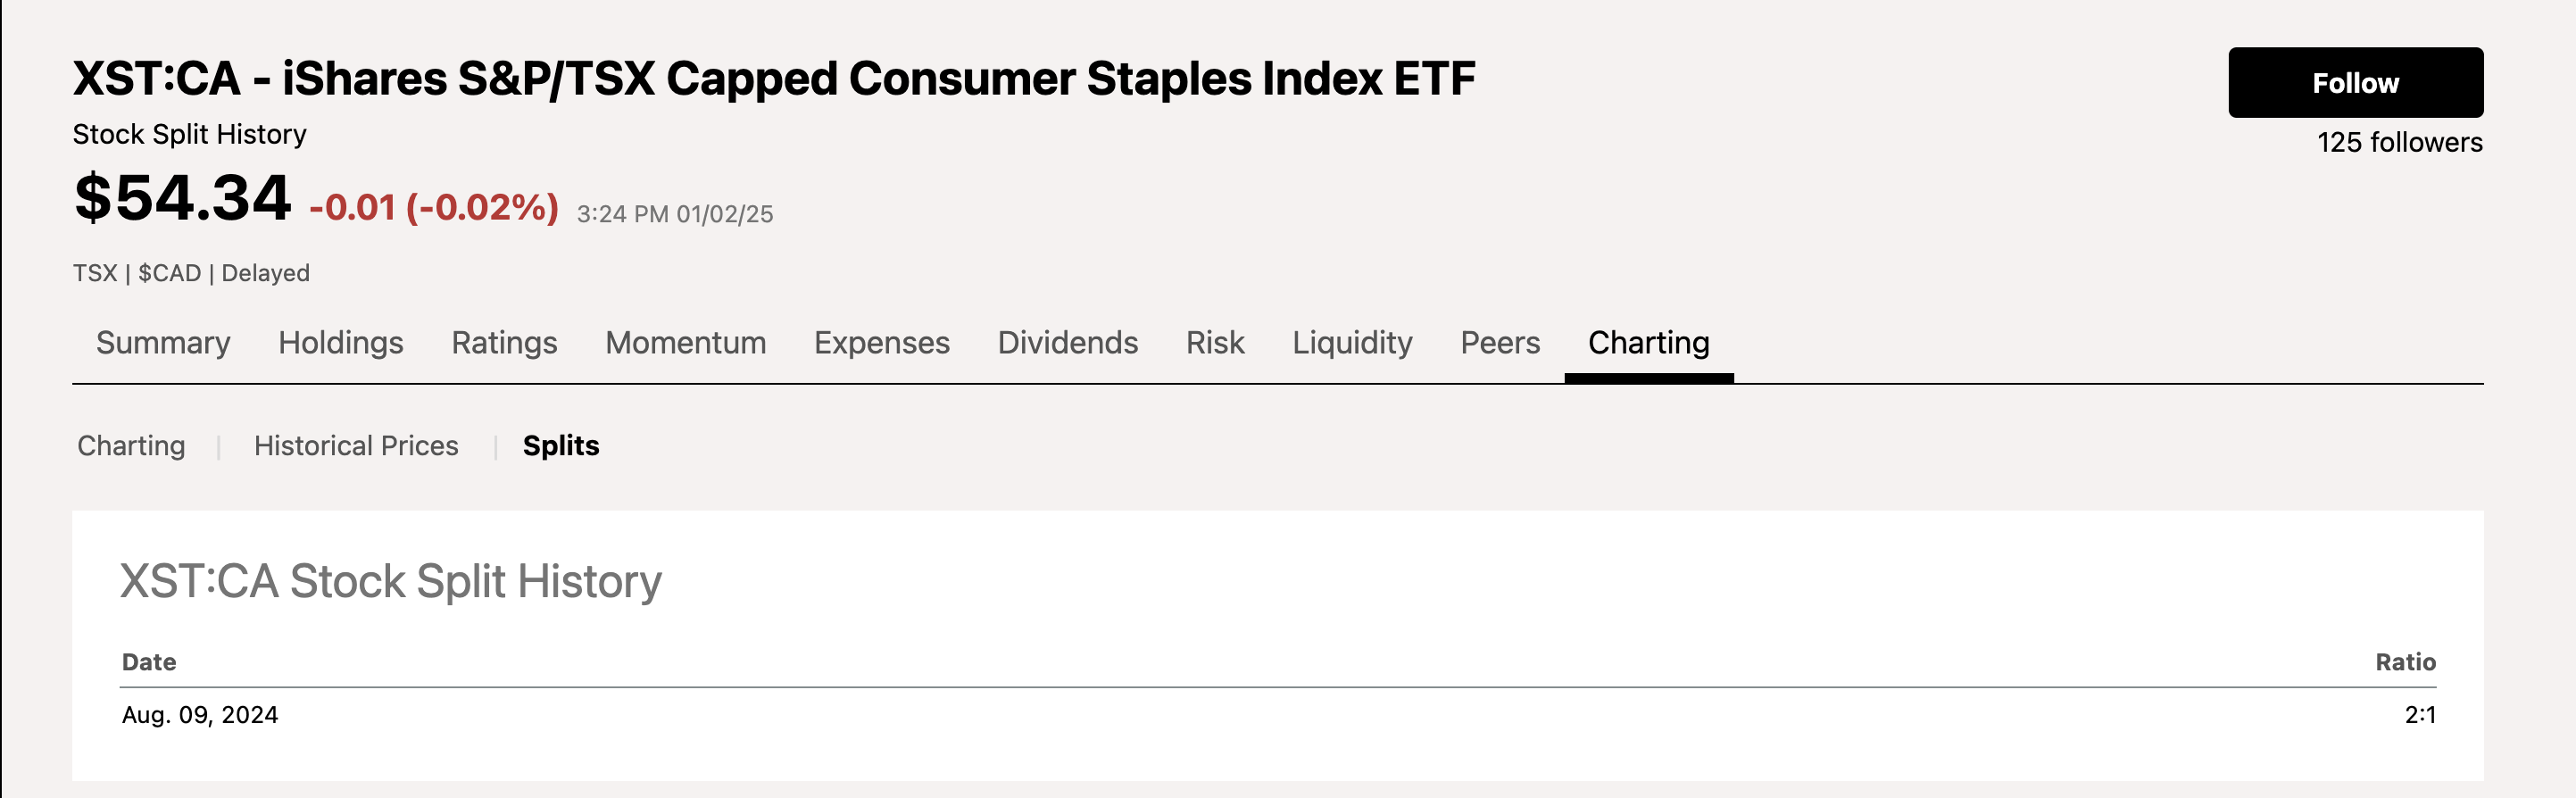

The data used is closing price and I cannot get **adjusted** closing price data because it is a premium feature of the API, so I will handle them mannuly later in '02_commonVolatility.R'.

##### 2. Summary stat and missing values

In [8]:
price.describe()

,Date,XIC.TO,XST.TO,ZIN.TO,XFN.TO,XMA.TO,XUT.TO,XIT.TO,XEG.TO,XRE.TO
count,5020,5020.000000,3276.000000,3036.000000,5020.000000,4772.000000,3425.000000,5020.000000,5020.000000,5020.000000
mean,2014-12-30 01:34:56.892430336,33.975971,56.092610,27.271006,36.152376,18.130478,24.045548,20.292185,26.246778,15.655086
min,2005-01-04 00:00:00,12.010000,19.000000,15.230000,11.660000,8.440000,18.209600,4.674500,2.760000,6.842100
25%,2009-12-29 18:00:00,20.970000,45.047500,21.407500,25.937500,13.327500,20.824000,8.082300,12.020000,14.392700
50%,2014-12-30 12:00:00,24.900000,54.310000,26.680000,36.425000,17.125000,22.624600,12.812800,15.880000,16.051300
75%,2019-12-31 12:00:00,33.392500,68.182500,33.572500,45.732500,20.300000,27.263500,30.589400,19.040000,17.081250
max,2024-12-31 00:00:00,95.180000,203.540000,44.650000,61.310000,46.320000,33.500000,71.780000,117.610000,21.548600
std,NaN,21.196066,20.604249,6.914911,11.011052,6.722642,3.868748,16.409756,26.865496,2.601586


In [9]:
import seaborn as sns
missing_mask = price.isnull()

<Axes: >

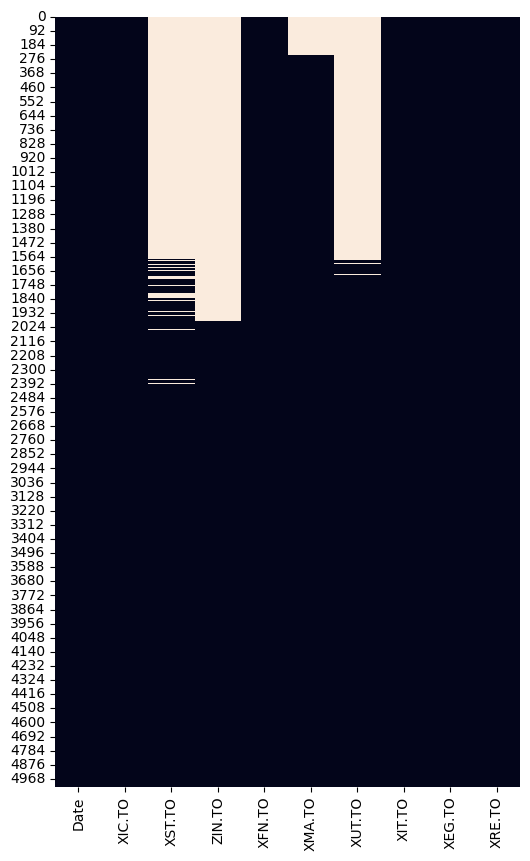

In [10]:
''' Show the pattern of missing values '''
plt.figure(figsize=(6, 10))
sns.heatmap(missing_mask, cbar=False)

In [11]:
price.fillna(method='ffill', inplace=True)

/var/folders/33/qv3yf4892xld1btchk4myrjc0000gn/T/ipykernel_4633/817434954.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price.fillna(method='ffill', inplace=True)


<Axes: >

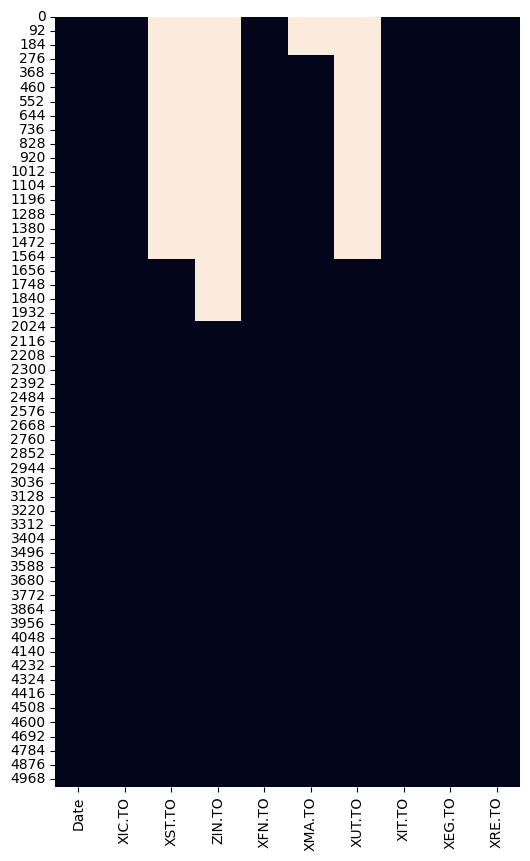

In [12]:
missing_mask2 = price.isna()
plt.figure(figsize=(6, 10))
sns.heatmap(missing_mask2, cbar=False)

##### 3. Compute log returns


In [13]:
import numpy as np
price.set_index(price.Date, inplace=True)
price.head()

,Date,XIC.TO,XST.TO,ZIN.TO,XFN.TO,XMA.TO,XUT.TO,XIT.TO,XEG.TO,XRE.TO
Date,,,,,,,,,,
2005-01-04,2005-01-04,56.3202,NaN,NaN,38.90,NaN,NaN,8.5643,49.30,11.8421
2005-01-05,2005-01-05,55.6498,NaN,NaN,38.47,NaN,NaN,8.4746,48.35,11.6903
2005-01-06,2005-01-06,55.6901,NaN,NaN,38.24,NaN,NaN,8.5083,49.10,11.7409
2005-01-07,2005-01-07,55.4801,NaN,NaN,38.05,NaN,NaN,8.4410,48.91,11.6903
2005-01-10,2005-01-10,55.3900,NaN,NaN,37.99,NaN,NaN,8.3962,49.18,11.7915


In [14]:
price = price.iloc[:, 1:]
price

,XIC.TO,XST.TO,ZIN.TO,XFN.TO,XMA.TO,XUT.TO,XIT.TO,XEG.TO,XRE.TO
Date,,,,,,,,,
2005-01-04,56.3202,NaN,NaN,38.90,NaN,NaN,8.5643,49.30,11.8421
2005-01-05,55.6498,NaN,NaN,38.47,NaN,NaN,8.4746,48.35,11.6903
2005-01-06,55.6901,NaN,NaN,38.24,NaN,NaN,8.5083,49.10,11.7409
2005-01-07,55.4801,NaN,NaN,38.05,NaN,NaN,8.4410,48.91,11.6903
2005-01-10,55.3900,NaN,NaN,37.99,NaN,NaN,8.3962,49.18,11.7915
...,...,...,...,...,...,...,...,...,...
2024-12-23,39.6400,55.06,42.19,59.88,21.21,28.06,69.3900,16.77,14.9800
2024-12-24,39.7400,54.99,42.45,60.00,21.24,28.15,69.8200,16.90,15.0500
2024-12-27,39.7200,54.88,42.48,60.13,21.17,28.11,70.5081,16.90,15.0100


In [15]:
p_tminus1 = price.shift(1)
p_tminus1.head()

,XIC.TO,XST.TO,ZIN.TO,XFN.TO,XMA.TO,XUT.TO,XIT.TO,XEG.TO,XRE.TO
Date,,,,,,,,,
2005-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,56.3202,NaN,NaN,38.90,NaN,NaN,8.5643,49.30,11.8421
2005-01-06,55.6498,NaN,NaN,38.47,NaN,NaN,8.4746,48.35,11.6903
2005-01-07,55.6901,NaN,NaN,38.24,NaN,NaN,8.5083,49.10,11.7409
2005-01-10,55.4801,NaN,NaN,38.05,NaN,NaN,8.4410,48.91,11.6903


In [16]:
r_tminus1 = np.log(p_tminus1)
r_tminus1

,XIC.TO,XST.TO,ZIN.TO,XFN.TO,XMA.TO,XUT.TO,XIT.TO,XEG.TO,XRE.TO
Date,,,,,,,,,
2005-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,4.031053,NaN,NaN,3.660994,NaN,NaN,2.147602,3.897924,2.471661
2005-01-06,4.019078,NaN,NaN,3.649879,NaN,NaN,2.137073,3.878466,2.458759
2005-01-07,4.019802,NaN,NaN,3.643882,NaN,NaN,2.141042,3.893859,2.463078
2005-01-10,4.016024,NaN,NaN,3.638901,NaN,NaN,2.133101,3.889982,2.458759
...,...,...,...,...,...,...,...,...,...
2024-12-23,3.673258,4.005149,3.746441,4.087823,3.046901,3.328268,4.232946,2.799109,2.716680
2024-12-24,3.679839,4.008423,3.742183,4.092343,3.054473,3.334345,4.239743,2.819592,2.706716
2024-12-27,3.682358,4.007151,3.748327,4.094345,3.055886,3.337547,4.245921,2.827314,2.711378


In [17]:
r_t = np.log(price)
r_t

,XIC.TO,XST.TO,ZIN.TO,XFN.TO,XMA.TO,XUT.TO,XIT.TO,XEG.TO,XRE.TO
Date,,,,,,,,,
2005-01-04,4.031053,NaN,NaN,3.660994,NaN,NaN,2.147602,3.897924,2.471661
2005-01-05,4.019078,NaN,NaN,3.649879,NaN,NaN,2.137073,3.878466,2.458759
2005-01-06,4.019802,NaN,NaN,3.643882,NaN,NaN,2.141042,3.893859,2.463078
2005-01-07,4.016024,NaN,NaN,3.638901,NaN,NaN,2.133101,3.889982,2.458759
2005-01-10,4.014399,NaN,NaN,3.637323,NaN,NaN,2.127779,3.895487,2.467379
...,...,...,...,...,...,...,...,...,...
2024-12-23,3.679839,4.008423,3.742183,4.092343,3.054473,3.334345,4.239743,2.819592,2.706716
2024-12-24,3.682358,4.007151,3.748327,4.094345,3.055886,3.337547,4.245921,2.827314,2.711378
2024-12-27,3.681855,4.005149,3.749033,4.096509,3.052585,3.336125,4.255728,2.827314,2.708717


In [18]:
logreturn = r_t - r_tminus1
logreturn

,XIC.TO,XST.TO,ZIN.TO,XFN.TO,XMA.TO,XUT.TO,XIT.TO,XEG.TO,XRE.TO
Date,,,,,,,,,
2005-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,-0.011975,NaN,NaN,-0.011116,NaN,NaN,-0.010529,-0.019458,-0.012902
2005-01-06,0.000724,NaN,NaN,-0.005997,NaN,NaN,0.003969,0.015393,0.004319
2005-01-07,-0.003778,NaN,NaN,-0.004981,NaN,NaN,-0.007941,-0.003877,-0.004319
2005-01-10,-0.001625,NaN,NaN,-0.001578,NaN,NaN,-0.005322,0.005505,0.008619
...,...,...,...,...,...,...,...,...,...
2024-12-23,0.006581,0.003275,-0.004257,0.004519,0.007572,0.006077,0.006796,0.020483,-0.009964
2024-12-24,0.002520,-0.001272,0.006144,0.002002,0.001413,0.003202,0.006178,0.007722,0.004662
2024-12-27,-0.000503,-0.002002,0.000706,0.002164,-0.003301,-0.001422,0.009807,0.000000,-0.002661


In [19]:
logreturn.to_csv('logreturn.csv')